## Standardisation

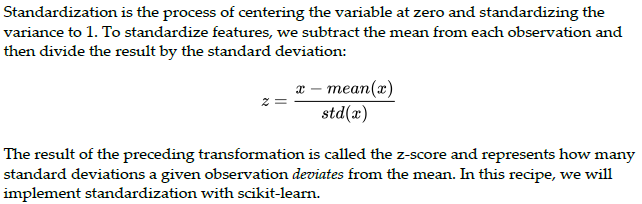

In [41]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
# Let's load variables and target from the Boston House Prices dataset from scikitlearn into a dataframe:

boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data,
columns=boston_dataset.feature_names)
data['MEDV'] = boston_dataset.target

In [43]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
# Now, divide the data into train and test sets:

X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3,random_state=0)

In [50]:
# Next, we'll set up a standard scaler transformer using StandardScaler() from scikit-learn and fit it to the train set so 
# that it learns each variable's meanand standard deviation:

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [56]:
# Now, let's standardize the train and test sets with the trained scaler; that is, we'll remove each variable's mean and 
# divide the result by the standard deviation:

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# StandardScaler() stores the mean and standard deviation that were learnedfrom the train set variables in its mean_ and 
# scale_ attributes.

In [52]:
X_train_scaled

array([[-0.20735619, -0.49997924,  1.54801583, ...,  1.2272573 ,
         0.42454294,  3.10807269],
       [-0.38886492,  0.34677427, -0.58974728, ...,  0.05696346,
         0.40185312, -0.66643035],
       [-0.33573486, -0.49997924,  1.54801583, ...,  1.2272573 ,
         0.39846135,  0.63936662],
       ...,
       [-0.38450355, -0.49997924, -0.15303077, ..., -0.30312696,
         0.39659002, -0.30284441],
       [-0.37511786, -0.49997924, -0.59690657, ..., -0.25811566,
         0.37588849,  0.89967717],
       [-0.38592298, -0.49997924, -1.00641779, ..., -0.84326258,
         0.42454294,  0.31822262]])

In [57]:
X_test_scaled

array([[-0.39454262, -0.49997924, -1.12239824, ..., -0.70822867,
         0.17086147, -0.72160487],
       [ 0.70419882, -0.49997924,  1.00534187, ...,  0.77714428,
         0.0648977 , -0.41177872],
       [-0.38890688, -0.49997924,  0.4025299 , ..., -0.93328518,
         0.38758427, -0.27454978],
       ...,
       [ 1.61285743, -0.49997924,  1.00534187, ...,  0.77714428,
         0.42454294,  2.59876943],
       [-0.34350332, -0.49997924, -0.1687812 , ..., -0.03305915,
         0.42454294, -1.11772962],
       [-0.39902507, -0.49997924, -1.27417512, ...,  0.10197476,
         0.39202867, -1.02294263]])

In [58]:
# First, we'll print the mean values that were learned by the scaler:

scaler.mean_

array([3.35828432e+00, 1.18093220e+01, 1.10787571e+01, 6.49717514e-02,
       5.56098305e-01, 6.30842655e+00, 6.89940678e+01, 3.76245876e+00,
       9.35310734e+00, 4.01782486e+02, 1.84734463e+01, 3.60601186e+02,
       1.24406497e+01])

In [59]:
# Now, let's print the standard deviation values that were learned by the scaler
# The mean values per variable can be seen in the following output:

scaler.scale_

# By doing this, you've learned how to standardize the variables in your datasets.

array([8.34141658e+00, 2.36196246e+01, 6.98393565e+00, 2.46476009e-01,
       1.15437239e-01, 7.01016354e-01, 2.79987983e+01, 2.06473886e+00,
       8.65974217e+00, 1.70351284e+02, 2.22166426e+00, 8.55009244e+01,
       7.06848020e+00])

### How it works...

In this recipe, we standardized the variables of the Boston House Prices dataset by utilizing
scikit-learn. To standardize these features, we needed to learn and store the mean and
standard deviation for each variable by utilizing the train set. Then, we used those
parameters to standardize the variables in the train and test sets. To do this, we used
StandardScaler() from scikit-learn, which can learn and store these parameters in its
attributes.
First, we loaded the dataset and divided it into train and test sets using the
train_test_split() function from scikit-learn. We passed the independent variables as
arguments. To do this, we dropped the target from the dataset with pandas' drop(). Next,
we passed the target as a pandas Series. Then, we specified the percentage of observations
to be placed in the test set and set random_state to zero for reproducibility.
To standardize these features, we used StandardScaler() from scikit-learn with its
default parameters. Using the fit() method and by taking the train set as an argument,
the scaler learned each variable's mean and standard deviation and stored them in its
mean_ and scale_ attributes. Using the transform() method, the scaler standardized
the variables in the train and test sets, returning NumPy arrays.

## Normalisation - Scaling to the maximum and minimum values

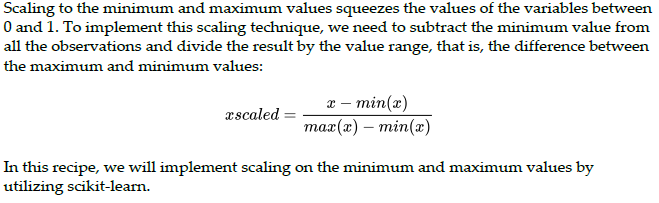

In [19]:
# Import pandas and the required scikit-learn classes and function:

import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Let's load the Boston House Prices dataset from scikit-learn into a pandas dataframe:

boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data,
columns=boston_dataset.feature_names)
data['MEDV'] = boston_dataset.target

In [21]:
# Let's divide the data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

In [22]:
# Let's set up a minimum and maximum value scaler utilizing scikit-learn and then fit it to the train set so that it learns 
# each variable's minimum and maximum:

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [23]:
# Finally, let's scale the variables in the train and test sets with the trained scaler;that is, we'll subtract the minimum and divide by the value range:

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MinMaxScaler() stores the maximum and minimum values and the value ranges in its data_max_, min_, and data_range_ attributes,
# respectively.

### How it works...

In this recipe, we scaled the numerical variables of the Boston House Prices dataset that
comes with scikit-learn to their minimum and maximum values. In order to learn and
perpetuate these parameters, we used MinMaxScaler() from scikit-learn.
First, we loaded the dataset and divided it into train and test sets using the
train_test_split() function from scikit-learn. To scale these features, we created an
instance of MinMaxScaler() with its default parameters. Using the fit() method and by
taking the train set as an argument, scaler learned each variable's maximum and
minimum values, along with their differences, and stored these parameters in its
data_max_, min_, and data_range attributes. With the transform() method, scaler
removed the minimum value from each variable in the train and test sets and divided the
result by the value range. This returned NumPy arrays.

## Other Techiques

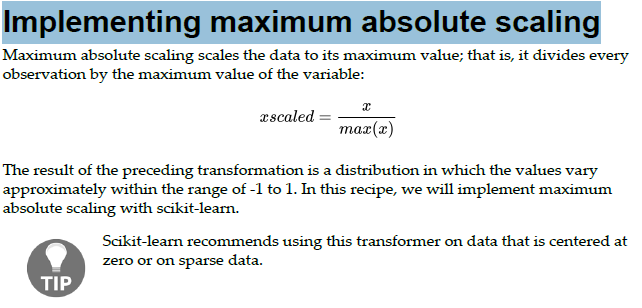

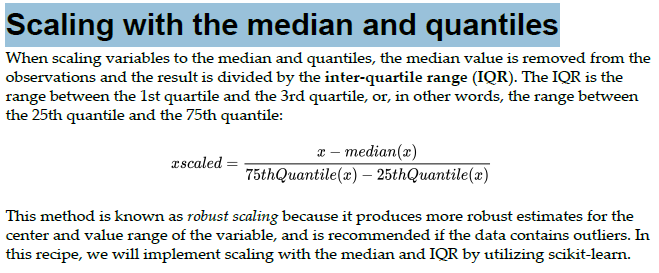